## Follow-up on requests for food aid at 211
Montreal Follow-Up on Requests for Food Aid at 211 is a service of the City of Montreal's to address food insecurity and assist residents in accessing food aid. Managed in collaboration with 211 Greater Montreal, a comprehensive referral service, the program ensures that individuals and families in need can receive timely and appropriate assistance.
The dataset presents all requests (telephone, chat and email) made to 211 Greater Montreal that are related to food in 2021 and 2022 as part of the food insecurity project funded by the City of Montreal 

The data is provided as csv. 

### Steps that are taken
- Load the csv file containing requests data and perform some analysis on the data
- Load the csv file containing follow-up data data and perform some analysis on the data
- Load the csv file containing needs / requirements data data and perform some analysis on the data
- Load the shapefile containing business data and perform some analysis on the data

### Data source
- https://donnees.Montreal.ca/dataset/demandes-aide-alimentaire
- Source: Open Data Portal Montreal
- Publisher: 211 Greater Montreal
- Accessed: 12.11.2023

In [1]:
# Importing required libraries for geospatial analysis, data manipulation, and visualization.
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns                 # For data visualization

from openpyxl import Workbook

# Suppress warnings for better readability of the output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ensure the "Figures" directory exists
output_folder = "Figures"
os.makedirs(output_folder, exist_ok=True)

In [3]:
# Define the folder path (you can use an absolute or relative path)
folder_path = "/home/jovyan/work/Data/"

# Set the environment variable, for example 'MY_FOLDER'
os.environ["Data_folder"] = folder_path

# You can verify it's set by printing it
print("Environment variable Data_folder is set to:", os.environ["Data_folder"])

Environment variable Data_folder is set to: /home/jovyan/work/Data/


In [4]:
# Get the folder path from the environment variable
folder_path = os.environ.get("Data_folder")
if not folder_path:
    raise ValueError("The environment variable Data_folder is not set.")

In [5]:
# Load requests for food aid
file_path = os.path.join(folder_path, "Food_aid_requests/suivis-aide-alimentaire.csv")
df = gpd.read_file(file_path)

# Load datasets
# Load follow-up data
# follow_up = gpd.read_file('Data/suivis-aide-alimentaire_EN.csv')
# suivis = gpd.read_file('Data/suivis-aide-alimentaire.csv')

df_EN = df.copy()
df.head(5)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,ID_Appels,Source_revenu_menage,Niveau_education,Situation_menage,Situation_logement,Citoyennete_statut_immigration,Historique_recours_aide_alimentaire,Obtenu_aide_grace_aux_ressources,Apres_combien_jours_demarches,Apres_combien_jours_obtenu_aide,Retourner_aux_ressources_aide,Niveau_satisfaction_globale,Pourquoi_pas_obtenu_aide,geometry
0,91794401,,,,,,,,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple sans enfant,Marché locatif privé,Citoyenneté canadienne à la naissance,Au moins une fois par mois depuis plusieurs an...,Oui a trouvé de l'aide parmi les ressources r...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,,,,,,,,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Personne célibataire vivant seule,Marché locatif privé,Citoyenneté canadienne acquise,Première fois,Non n'a pas obtenu d'aide,Même jour,,,,,None
4,92021668,Aide sociale,Primaire,Personne célibataire vivant seule,Marché locatif privé,Citoyenneté canadienne acquise,Première fois,Oui a trouvé de l'aide parmi les ressources r...,,,Oui au moins une fois par mois,5,,None


In [6]:
# Dictionary mapping from original column names (French) to new column names (English)
replacements_columns = {
    "ID_Appels": "ID_Call",
    "Source_revenu_menage": "Source_of_household_income",
    "Niveau_education": "Education_level",
    "Situation_menage": "Household_situation",
    "Situation_logement": "Housing_situation",
    "Citoyennete_statut_immigration": "Citizenship_immigration_status",
    "Historique_recours_aide_alimentaire": "History_of_food_aid_use",
    "Obtenu_aide_grace_aux_ressources": "Obtained_aid_through_resources",
    "Apres_combien_jours_demarches": "After_how_many_days_help",
    "Apres_combien_jours_obtenu_aide": "After_how_many_days_obtained_help",
    "Retourner_aux_ressources_aide": "Return_to_resources_help",
    "Niveau_satisfaction_globale": "Overall_satisfaction_level",
    "Pourquoi_pas_obtenu_aide": "Why_not_get_help",
    "": "No information"
}

# Rename the DataFrame columns using the replacements_columns dictionary
df_EN.rename(columns=replacements_columns, inplace=True)

# Optional: Display the first few rows of the updated DataFrame to verify the changes
df_EN.head(3)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,,,,,,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple sans enfant,Marché locatif privé,Citoyenneté canadienne à la naissance,Au moins une fois par mois depuis plusieurs an...,Oui a trouvé de l'aide parmi les ressources r...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,,,,,,,,,,,None


In [7]:
# Create a dictionary for all the replacement mappings in the 'Household_situation' column
replacements = {
    "Biparentale": "Two-parent",
    "Cohabitation": "Common-law couples",
    "Couple sans enfant": "Couple without children",
    "Monoparentale": "Single-parent",
    "Multigénérationnel": "Multigenerational",
    "Ne souhaite pas répondre": "Do not wish to answer",
    "Personne célibataire vivant seule": "Single person living alone",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['Household_situation'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(3)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,,,,,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Marché locatif privé,Citoyenneté canadienne à la naissance,Au moins une fois par mois depuis plusieurs an...,Oui a trouvé de l'aide parmi les ressources r...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,,,,,,,,,,None


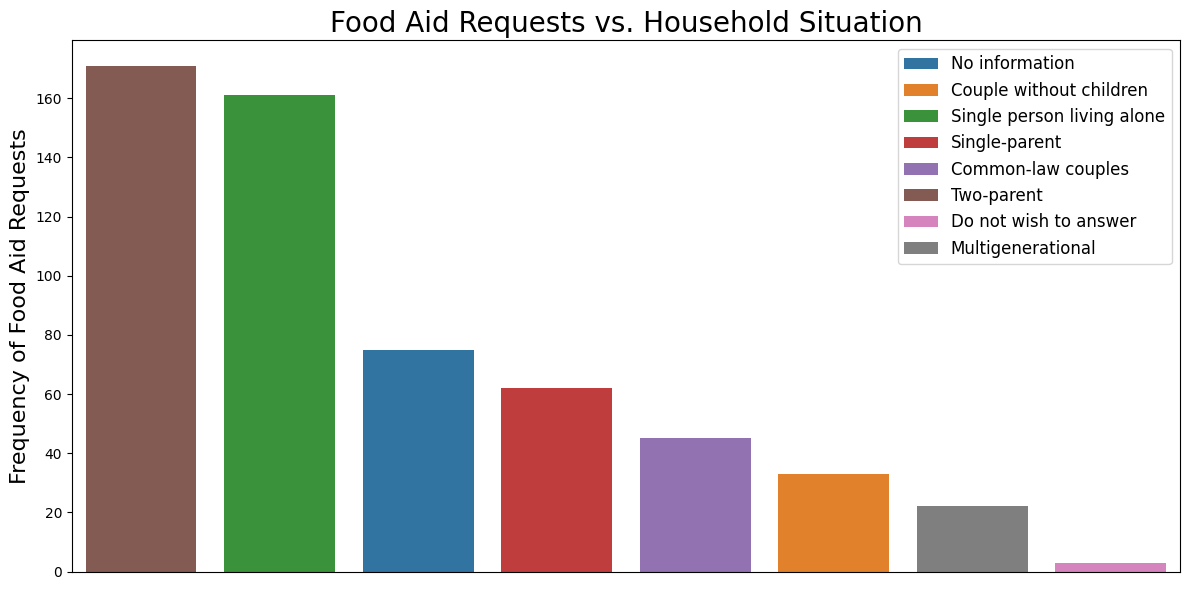

In [8]:
# Drop rows where 'Household_situation' is missing
df_non_null = df_EN.dropna(subset=['Household_situation'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Household_situation'].value_counts().index

# Set the size of the figure for better visualization
plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Household_situation',
    hue='Household_situation',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Household Situation', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_household_situation.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [9]:
# Create a dictionary for all the replacement mappings in the 'Housing_situation' column
replacements = {
    "Coopérative": "Cooperative",
    "Logement subventionné": "Subsidized housing",
    "Marché locatif privé": "Private rental market",
    "Ne souhaite pas répondre": "Do not wish to answer",
    "Propriétaire": "Owner",
    "Résidence privée pour aîné-es": "Private residence for seniors",
    "Sans domicile fixe": "Homeless",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['Housing_situation'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,,,,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Citoyenneté canadienne à la naissance,Au moins une fois par mois depuis plusieurs an...,Oui a trouvé de l'aide parmi les ressources r...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,No information,,,,,,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Citoyenneté canadienne acquise,Première fois,Non n'a pas obtenu d'aide,Même jour,,,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Citoyenneté canadienne acquise,Première fois,Oui a trouvé de l'aide parmi les ressources r...,,,Oui au moins une fois par mois,5,,None


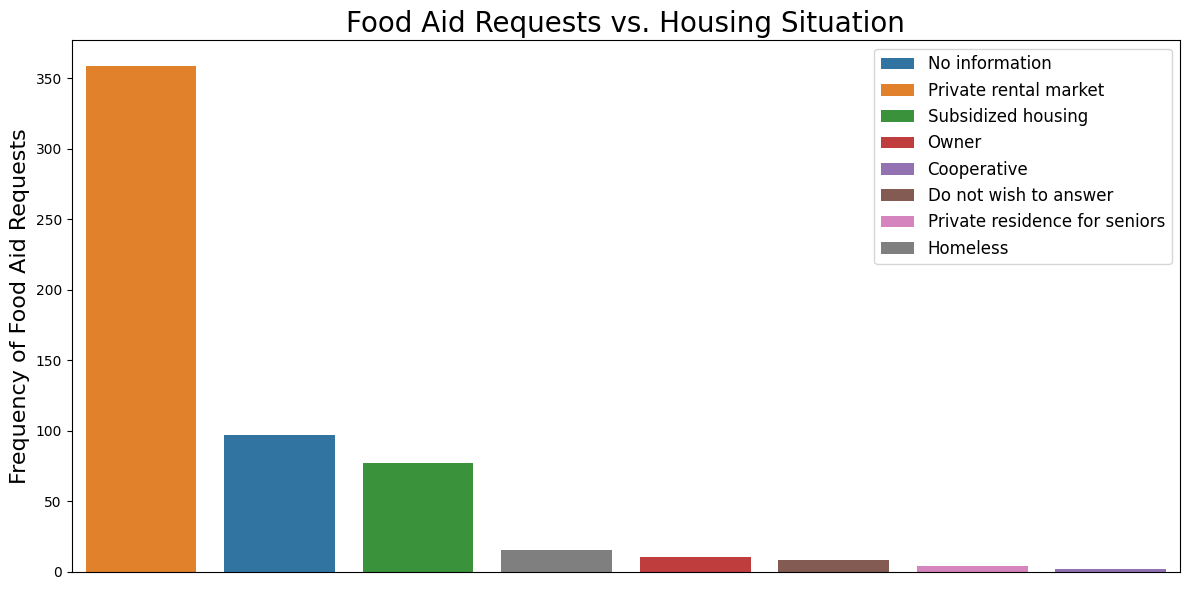

In [10]:
# Drop rows where 'Housing_situation' is missing
df_non_null = df_EN.dropna(subset=['Housing_situation'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Housing_situation'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Housing_situation',
    hue='Housing_situation',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Housing Situation', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_housing_situation.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [11]:
# Create a dictionary for all the replacement mappings in the 'Citizenship_immigration_status' column
replacements = {
    "Citoyenneté canadienne à la naissance": "Canadian citizenship at birth",
    "Citoyenneté canadienne acquise": "Canadian citizenship acquired",
    "Demande dasile": "Application form",
    "Ne souhaite pas répondre": "Do not wish to answer",
    "Réfugié-e": "Refugee",
    "Résidence permanente": "Permanent residence",
    "Visa temporaire": "Temporary visa",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['Citizenship_immigration_status'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,,,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,Au moins une fois par mois depuis plusieurs an...,Oui a trouvé de l'aide parmi les ressources r...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,No information,No information,,,,,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,Première fois,Non n'a pas obtenu d'aide,Même jour,,,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,Première fois,Oui a trouvé de l'aide parmi les ressources r...,,,Oui au moins une fois par mois,5,,None


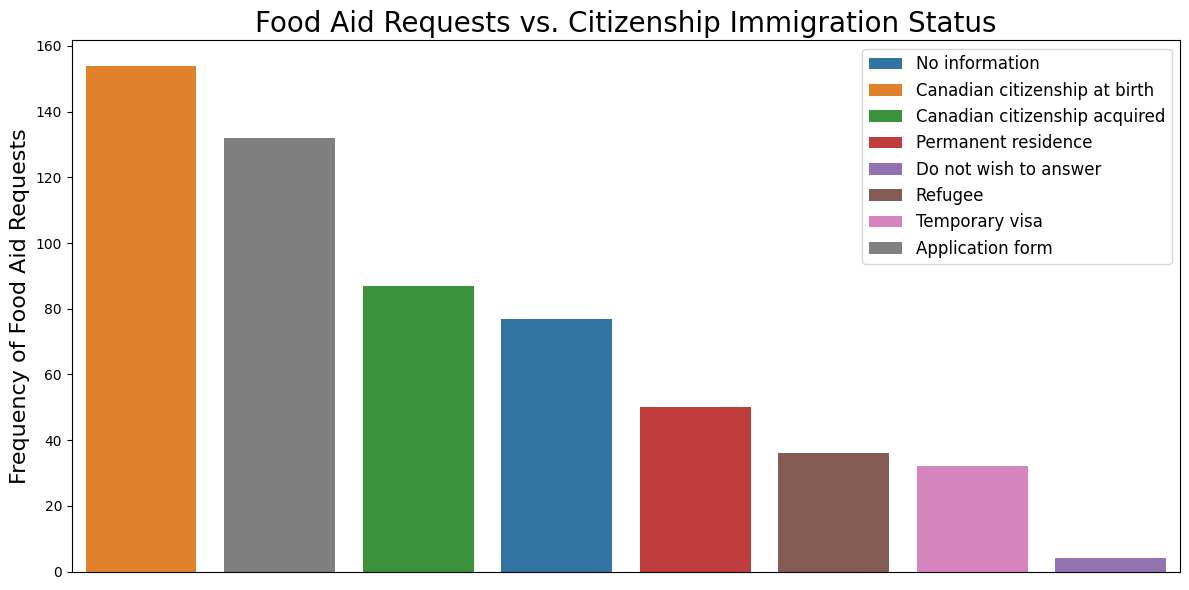

In [12]:
# Drop rows where 'Citizenship_immigration_status' is missing
df_non_null = df_EN.dropna(subset=['Citizenship_immigration_status'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Citizenship_immigration_status'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Citizenship_immigration_status',
    hue='Citizenship_immigration_status',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Citizenship Immigration Status', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_citizenship_immigration_status_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [13]:
# Create a dictionary for all the replacement mappings in the 'History_of_food_aid_use' column
replacements = {
    "Au moins une fois par mois depuis plusieurs années (avant mars 2020)": "At least once a month for several years (before March 2020)",
    "Minimum une fois par mois depuis le début de la pandémie (mars 2020)": "At least once a month since the start of the pandemic (March 2020)",
    "Moins d'une fois par mois depuis le début de la pandémie (mars 2020)": "Less than once a month since the start of the pandemic (March 2020)",
    "Moins d'une fois par mois depuis plusieurs années (avant mars 2020)": "Less than once a month for several years (prior to March 2020)",
    "Ne souhaite pas répondre": "Do not wish to answer",
    "Première fois": "First time",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['History_of_food_aid_use'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,No information,,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Oui a trouvé de l'aide parmi les ressources r...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,No information,No information,No information,,,,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Non n'a pas obtenu d'aide,Même jour,,,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Oui a trouvé de l'aide parmi les ressources r...,,,Oui au moins une fois par mois,5,,None


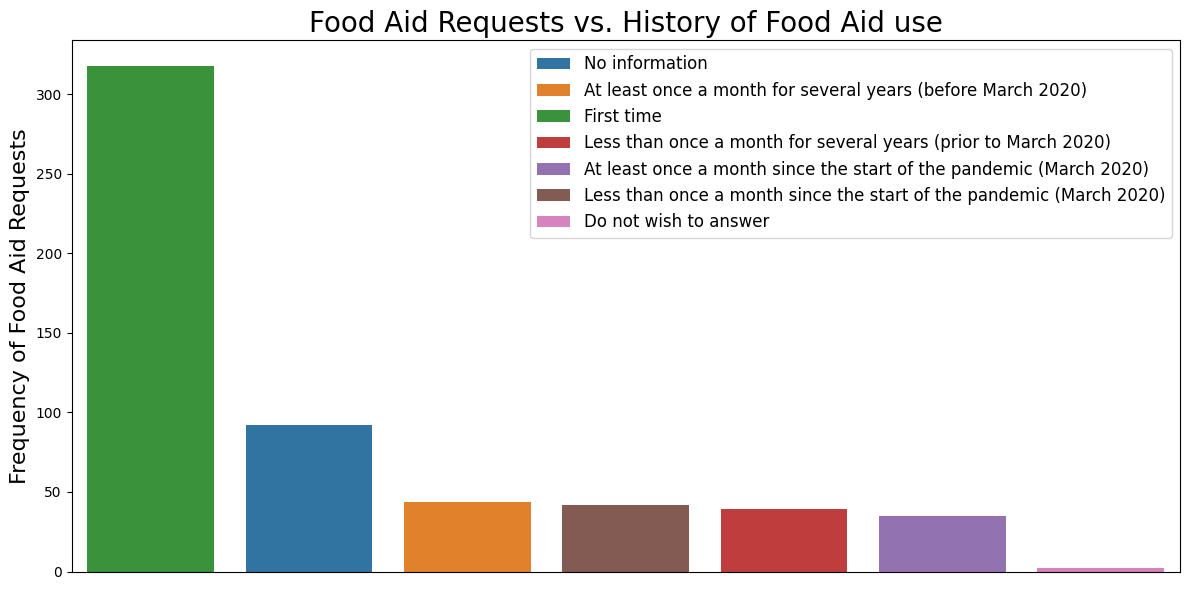

In [14]:
# Drop rows where 'History_of_food_aid_use' is missing
df_non_null = df_EN.dropna(subset=['History_of_food_aid_use'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['History_of_food_aid_use'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='History_of_food_aid_use',
    hue='History_of_food_aid_use',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. History of Food Aid use', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_history_of_food_aid_use_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()


In [15]:
# Create a dictionary for all the replacement mappings in the 'Obtained_aid_through_resources' column
replacements = {
    "En attente  a obtenu un rendez-vous / Waiting  got an appointment": "Waiting for an appointment",
    "Non  a trouvé de l'aide  mais auprès d'autres ressources non référées par le 211": "No found help but from other resources not referred by 211",
    "Non  n'a pas obtenu d'aide": "No did not get help",
    "Oui  a trouvé de l'aide parmi les ressources référées par le 211 après le premier suivi": "Yes found help from resources referred by 211 after first follow-up",
    "Oui  a trouvé de l'aide parmi les ressources référées par le 211 après un deuxième suivi": "Yes found help from resources referred by 211 after second follow-up",
    "Oui  a trouvé de l'aide parmi les ressources référées par le 211 dès la première fois": "Yes found help from resources referred by 211 the first time around",
    "Oui  a trouvé de l'aide parmi les ressources référées par le 211 après un deuxième suivi": "Yes found help among the resources referred by 211 after a second follow-up",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['Obtained_aid_through_resources'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,No information,No information,,,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help from resources referred by 211 ...,Même jour,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,No information,No information,No information,No information,,,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Même jour,,,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help from resources referred by 211 ...,,,Oui au moins une fois par mois,5,,None


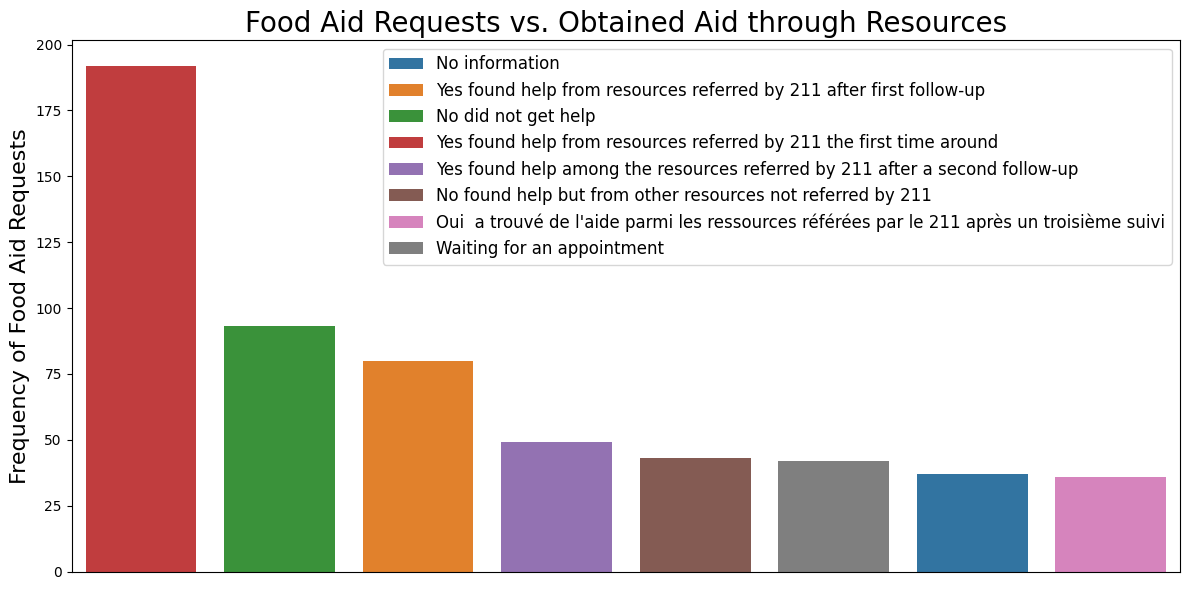

In [16]:
# Drop rows where 'Obtained_aid_through_resources' is missing
df_non_null = df_EN.dropna(subset=['Obtained_aid_through_resources'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Obtained_aid_through_resources'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Obtained_aid_through_resources',
    hue='Obtained_aid_through_resources',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Obtained Aid through Resources', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_obtained_aid_through_resources_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [17]:
# Create a dictionary for all the replacement mappings in the 'After_how_many_days_help' column
replacements = {
    "Après 2 jours ou plus": "After 2 days or more",
    "Lendemain": "The day after",
    "Même jour": "Same day",
    "Ne les a pas contacté": "Did not contact them",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['After_how_many_days_help'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,No information,No information,No information,,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help from resources referred by 211 ...,Same day,Après 1 semaine ou plus,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,No information,No information,No information,No information,No information,,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Same day,,,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help from resources referred by 211 ...,No information,,Oui au moins une fois par mois,5,,None


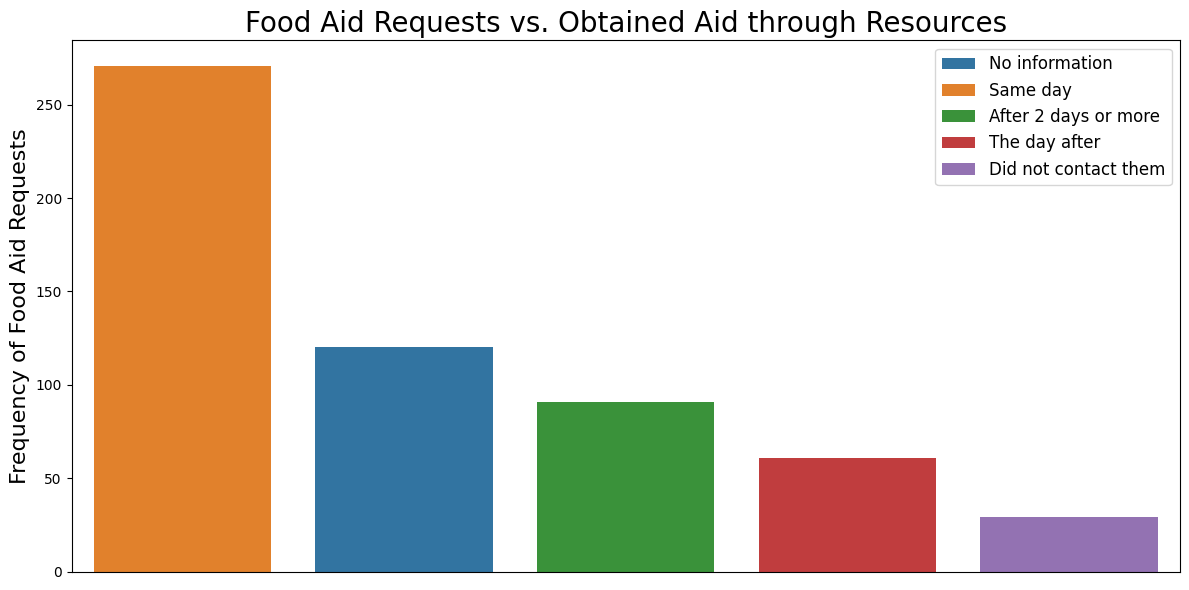

In [18]:
# Drop rows where 'After_how_many_days_help' is missing
df_non_null = df_EN.dropna(subset=['After_how_many_days_help'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['After_how_many_days_help'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='After_how_many_days_help',
    hue='After_how_many_days_help',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Obtained Aid through Resources', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_after_how_many_days_help_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [19]:
# Create a dictionary for all the replacement mappings in the 'After_how_many_days_obtained_help' column
replacements = {
    "Après 1 semaine ou plus": "After 1 week or more",
    "Après 2 jours ou plus": "After 2 days or more",
    "Lendemain": "The day after",
    "Même jour": "Same day",
    "Na pas reçu daide encore": "No help yet",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['After_how_many_days_obtained_help'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,No information,No information,No information,No information,,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help from resources referred by 211 ...,Same day,After 1 week or more,Oui au moins une fois par mois,4,Coût trop élevé,None
2,91895861,,,No information,No information,No information,No information,No information,No information,No information,,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Same day,No information,,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help from resources referred by 211 ...,No information,No information,Oui au moins une fois par mois,5,,None


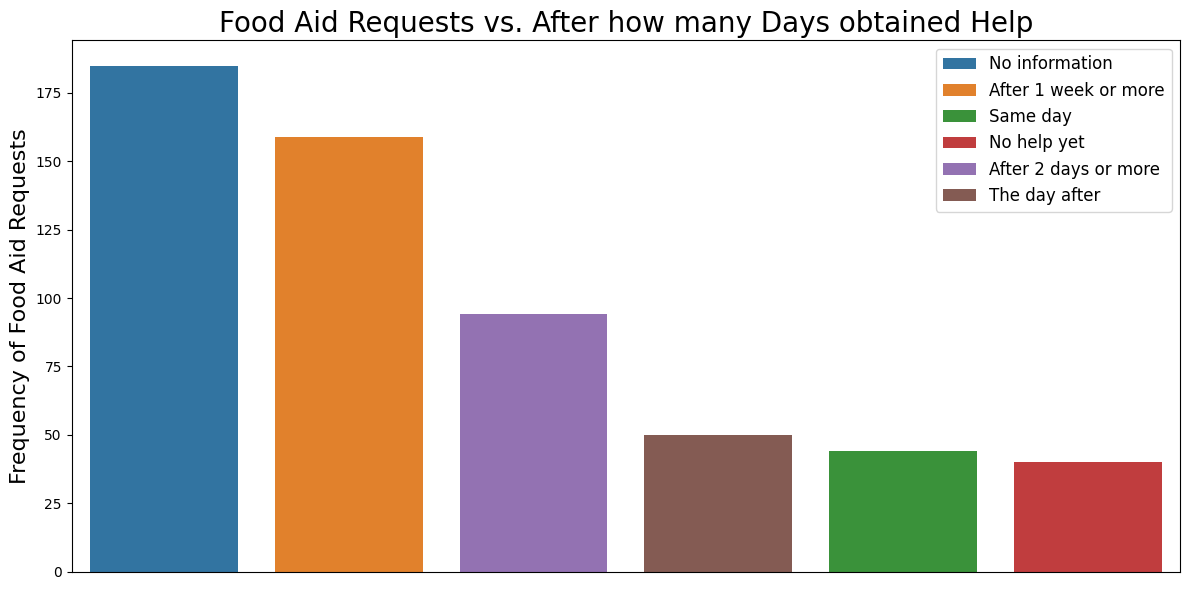

In [20]:
# Drop rows where 'After_how_many_days_obtained_help' is missing
df_non_null = df_EN.dropna(subset=['After_how_many_days_obtained_help'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['After_how_many_days_obtained_help'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='After_how_many_days_obtained_help',
    hue='After_how_many_days_obtained_help',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. After how many Days obtained Help', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_after_how_many_days_obtained_help_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [21]:
# Create a dictionary for all the replacement mappings in the 'Return_to_resources_help' column
replacements = {
    "Non  je n'ai pas été satisfait·e du service": "No, I was not satisfied with the service",
    "Oui  au moins une fois par mois": "Yes, at least once a month",
    "Oui  mais moins d'une fois par mois": "Yes, but less than once a month",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['Return_to_resources_help'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,No information,No information,No information,No information,No information,,,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help from resources referred by 211 ...,Same day,After 1 week or more,"Yes, at least once a month",4,Coût trop élevé,None
2,91895861,,,No information,No information,No information,No information,No information,No information,No information,No information,,,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Same day,No information,No information,,,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help from resources referred by 211 ...,No information,No information,"Yes, at least once a month",5,,None


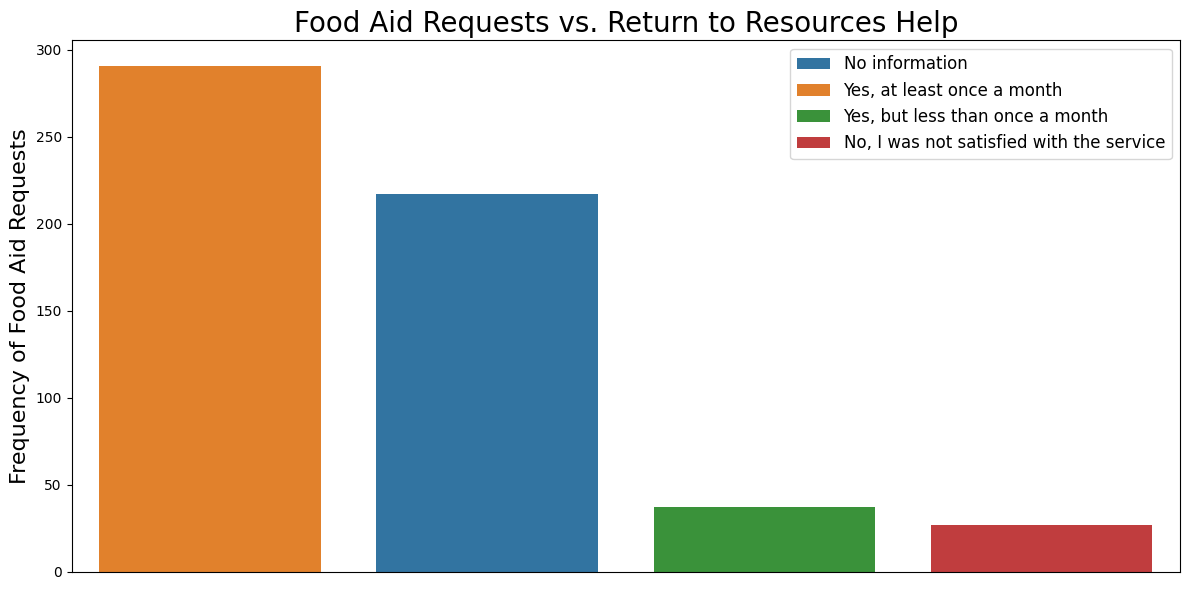

In [22]:
# Drop rows where 'Return_to_resources_help' is missing
df_non_null = df_EN.dropna(subset=['Return_to_resources_help'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Return_to_resources_help'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Return_to_resources_help',
    hue='Return_to_resources_help',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Return to Resources Help', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_return_to_resources_help_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [23]:
# Create a dictionary for all the replacement mappings in the 'Why_not_get_help' column
replacements = {
    "Aucun transport": "No transport",
    "Autres": "Other",
    "Autres;Aucun transport": "Other;No transport",
    "Autres;Incapacité à joindre l'organisme": "Other;Unable to reach organization",
    "Barrière linguistique": "Language barrier",
    "Conditions d'admission non remplies": "Admission requirements not met",
    "Coût trop élevé": "Cost too high",
    "Fermeture de l'organisme": "Closing the organization",
    "Horaire de service ne convient pas": "Service schedule not suitable",
    "Incapacité à joindre l'organisme": "Inability to reach the organization",
    "Incompatibilité dappartenance religieuse": "Incompatibility of religious affiliation",
    "Liste d'attente complète": "Full waiting list",
    "Processus dinscription trop complexe": "Registration process too complex",
    "Service temporairement non disponible": "Service temporarily unavailable",
    "": "No information"
}

# Replace values in the 'Why_not_get_help' column using the replacements dictionary
df_EN['Why_not_get_help'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,,,No information,No information,No information,No information,No information,No information,No information,No information,,No information,None
1,91805422,Aide sociale,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help from resources referred by 211 ...,Same day,After 1 week or more,"Yes, at least once a month",4,Cost too high,None
2,91895861,,,No information,No information,No information,No information,No information,No information,No information,No information,,No information,None
3,91950631,Régimes dinvalidité,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Same day,No information,No information,,No information,None
4,92021668,Aide sociale,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help from resources referred by 211 ...,No information,No information,"Yes, at least once a month",5,No information,None


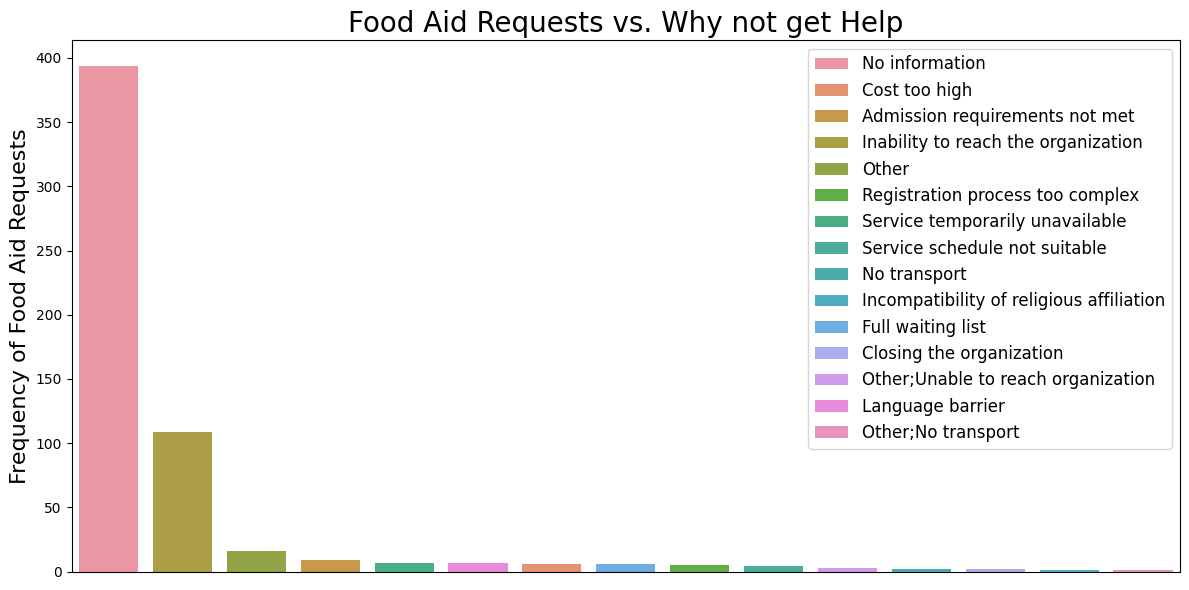

In [24]:
# Drop rows where 'Source_of_household_income' is missing
df_non_null = df_EN.dropna(subset=['Why_not_get_help'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Why_not_get_help'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Why_not_get_help',
    hue='Why_not_get_help',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Why not get Help', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_why_not_get_help_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [25]:
# Create a dictionary for all the replacement mappings in the 'Source_of_household_income' column
replacements = {
    "Aide sociale": "Social assistance",
    "Allocation familiale": "Family allowance",
    "Assurance emploi (chômage)": "Unemployment insurance",
    "Aucun revenu": "No income",
    "Autre": "Other",
    "Emploi temps partiel": "Part-time employment",
    "Emploi temps plein": "Full-time employment",
    "Ne veut pas répondre": "Don't want to answer",
    "Pension de vieillesse": "Old-age pension",
    "Prêts et bourses étudiants": "Student loans and grants",
    "Régimes dinvalidité": "Disability plans",
    "": "No information"
}

# Replace values in the 'Source_of_household_income' column using the replacements dictionary
df_EN['Source_of_household_income'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
df_EN.head(5)

,ID_Call,Source_of_household_income,Education_level,Household_situation,Housing_situation,Citizenship_immigration_status,History_of_food_aid_use,Obtained_aid_through_resources,After_how_many_days_help,After_how_many_days_obtained_help,Return_to_resources_help,Overall_satisfaction_level,Why_not_get_help,geometry
0,91794401,No information,,No information,No information,No information,No information,No information,No information,No information,No information,,No information,None
1,91805422,Social assistance,Secondaire,Couple without children,Private rental market,Canadian citizenship at birth,At least once a month for several years (befor...,Yes found help from resources referred by 211 ...,Same day,After 1 week or more,"Yes, at least once a month",4,Cost too high,None
2,91895861,No information,,No information,No information,No information,No information,No information,No information,No information,No information,,No information,None
3,91950631,Disability plans,Secondaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,No did not get help,Same day,No information,No information,,No information,None
4,92021668,Social assistance,Primaire,Single person living alone,Private rental market,Canadian citizenship acquired,First time,Yes found help from resources referred by 211 ...,No information,No information,"Yes, at least once a month",5,No information,None


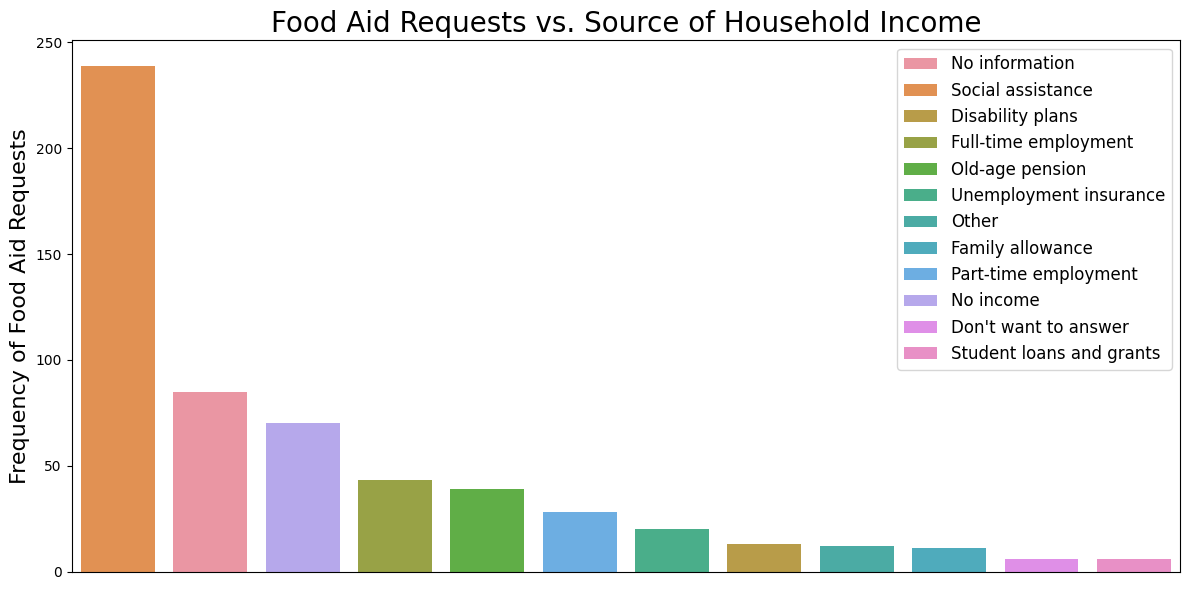

In [26]:
# Drop rows where 'Source_of_household_income' is missing
df_non_null = df_EN.dropna(subset=['Source_of_household_income'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Source_of_household_income'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Source_of_household_income',
    hue='Source_of_household_income',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Source of Household Income', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_source_of_household_income_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [27]:
# Create a dictionary for all the replacement mappings in the 'Education_level' column
replacements = {
    "Ne veut pas répondre": "Don't want to answer",
    "Collégial (Technique)": "College (Technical)",
    "Primaire": "Primary",
    "Professionnel (DEP)": "Professional (DEP)",
    "Secondaire": "Secondary",
    "Universitaire - 1er cycle": "University - 1st cycle",
    "Universitaire - 2e cycle": "University - 2nd cycle",
    "Universitaire - 3e cycle": "University - 3rd cycle",
    "": "No information"
}

# Replace values in the 'Education_level' column using the replacements dictionary
df_EN['Education_level'].replace(replacements, inplace=True)

# Display the first 10 rows of the updated DataFrame
# df_EN.head(5)

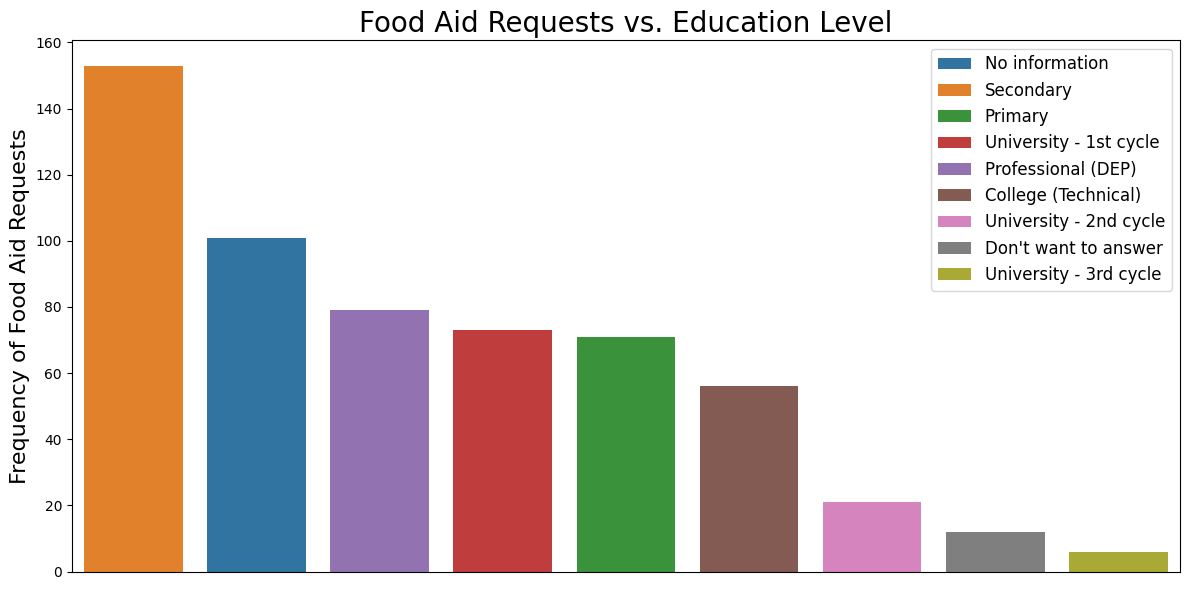

In [28]:
# Drop rows where 'Education_level' is missing
df_non_null = df_EN.dropna(subset=['Education_level'])

# Calculate the order of the categories based on their frequency (highest count first)
# value_counts() returns a Series sorted by count in descending order, and .index gives the categories in that order.
order = df_non_null['Education_level'].value_counts().index

plt.figure(figsize=(12, 6))
# Use hue to assign a different color to each category
ax = sns.countplot(
    data=df_non_null,
    x='Education_level',
    hue='Education_level',  # this creates a legend from the categories
    order=order,
    dodge=False  # ensures one bar per category
)

# Hide the x-axis (and its labels)
ax.xaxis.set_visible(False)

# Set the title and y-axis label
plt.title('Food Aid Requests vs. Education Level', size=20)
plt.ylabel('Frequency of Food Aid Requests', size=16)

# Customize the legend appearance
plt.legend(title='', fontsize=12, title_fontsize=14)

plt.tight_layout()
output_path = os.path.join(output_folder, 'Food_aid_requests_vs_education_level_legend.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [29]:
# Save the DataFrame to an Excel file
# df_EN.to_excel('df_EN.xlsx', index=False)
df_EN.to_excel('follow_up_suivis-aide-alimentaire_EN.xlsx', index=False)

In [30]:
observed_household_situation = df_EN['Household_situation'].value_counts().sort_index()
print("Observed Frequencies for Household Situation:")
print(observed_household_situation)

Observed Frequencies for Household Situation:
Household_situation
Common-law couples             45
Couple without children        33
Do not wish to answer           3
Multigenerational              22
No information                 75
Single person living alone    161
Single-parent                  62
Two-parent                    171
Name: count, dtype: int64


In [31]:
# weights_household_situation
observed_household_situation = pd.DataFrame(list(observed_household_situation.items()), columns=["Household_situation", "Count"])
# Add a new column "sum" with the total sum of "Count"
observed_household_situation['sum'] = observed_household_situation["Count"].sum()
observed_household_situation['weight'] = observed_household_situation['Count'] / observed_household_situation['sum']
observed_household_situation

,Household_situation,Count,sum,weight
0,Common-law couples,45,572,0.078671
1,Couple without children,33,572,0.057692
2,Do not wish to answer,3,572,0.005245
3,Multigenerational,22,572,0.038462
4,No information,75,572,0.131119
5,Single person living alone,161,572,0.281469
6,Single-parent,62,572,0.108392
7,Two-parent,171,572,0.298951


In [32]:
observed_housing_situation = df_EN['Housing_situation'].value_counts().sort_index()
print("Observed Frequencies for Housing Situation:")
print(observed_housing_situation)

Observed Frequencies for Housing Situation:
Housing_situation
Cooperative                        2
Do not wish to answer              8
Homeless                          15
No information                    97
Owner                             10
Private rental market            359
Private residence for seniors      4
Subsidized housing                77
Name: count, dtype: int64


In [33]:
# weights_housing_situation
observed_housing_situation = pd.DataFrame(list(observed_housing_situation.items()), columns=["Housing_situation", "Count"])
# Add a new column "sum" with the total sum of "Count"
observed_housing_situation['sum'] = observed_housing_situation["Count"].sum()
observed_housing_situation['weight'] = observed_housing_situation['Count'] / observed_housing_situation['sum']
observed_housing_situation

,Housing_situation,Count,sum,weight
0,Cooperative,2,572,0.003497
1,Do not wish to answer,8,572,0.013986
2,Homeless,15,572,0.026224
3,No information,97,572,0.169580
4,Owner,10,572,0.017483
5,Private rental market,359,572,0.627622
6,Private residence for seniors,4,572,0.006993
7,Subsidized housing,77,572,0.134615


In [34]:
observed_citizenship_immigration_status = df_EN['Citizenship_immigration_status'].value_counts().sort_index()
print("Observed Frequencies for Citizenship immigration status:")
observed_housing_situation

Observed Frequencies for Citizenship immigration status:


,Housing_situation,Count,sum,weight
0,Cooperative,2,572,0.003497
1,Do not wish to answer,8,572,0.013986
2,Homeless,15,572,0.026224
3,No information,97,572,0.169580
4,Owner,10,572,0.017483
5,Private rental market,359,572,0.627622
6,Private residence for seniors,4,572,0.006993
7,Subsidized housing,77,572,0.134615


In [35]:
# weights_housing_situation
observed_citizenship_immigration_status = pd.DataFrame(list(observed_citizenship_immigration_status.items()), columns=["Citizenship_immigration_status", "Count"])
# Add a new column "sum" with the total sum of "Count"
observed_citizenship_immigration_status['sum'] = observed_citizenship_immigration_status["Count"].sum()
observed_citizenship_immigration_status['weight'] = observed_citizenship_immigration_status['Count'] / observed_citizenship_immigration_status['sum']
observed_citizenship_immigration_status

,Citizenship_immigration_status,Count,sum,weight
0,Application form,132,572,0.230769
1,Canadian citizenship acquired,87,572,0.152098
2,Canadian citizenship at birth,154,572,0.269231
3,Do not wish to answer,4,572,0.006993
4,No information,77,572,0.134615
5,Permanent residence,50,572,0.087413
6,Refugee,36,572,0.062937
7,Temporary visa,32,572,0.055944


In [36]:
observed_education_level = df_EN['Education_level'].value_counts().sort_index()
print("Observed Frequencies for Education level:")
observed_education_level

Observed Frequencies for Education level:


Education_level
College (Technical)        56
Don't want to answer       12
No information            101
Primary                    71
Professional (DEP)         79
Secondary                 153
University - 1st cycle     73
University - 2nd cycle     21
University - 3rd cycle      6
Name: count, dtype: int64

In [37]:
observed_source_of_household_income = df_EN['Source_of_household_income'].value_counts().sort_index()
print("Observed Frequencies for Source of household income:")
observed_source_of_household_income

Observed Frequencies for Source of household income:


Source_of_household_income
Disability plans             13
Don't want to answer          6
Family allowance             11
Full-time employment         43
No income                    70
No information               85
Old-age pension              39
Other                        12
Part-time employment         28
Social assistance           239
Student loans and grants      6
Unemployment insurance       20
Name: count, dtype: int64